# Project 3: The I-94 Traffic Dataset

For this project, we will be analyzing a dataset about the westbound traffic on the I-94 interstate highway.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.



In [68]:
import pandas as pd

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(traffic)

traffic.info()

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0        None  288.28      0.0      0.0          40        Clouds   
1        None  289.36      0.0      0.0          75        Clouds   
2        None  289.58      0.0      0.0          90        Clouds   
3        None  290.13      0.0      0.0          90        Clouds   
4        None  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1               broken clouds  20

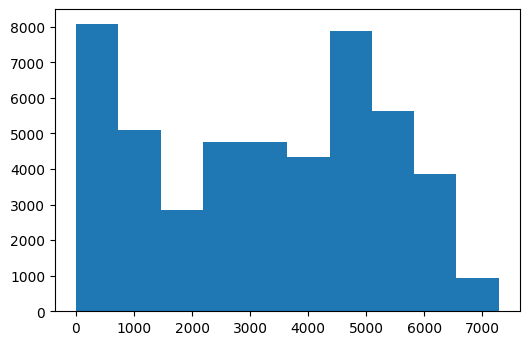

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(traffic['traffic_volume'])
plt.show()

traffic['traffic_volume'].describe()

##### Inital Observations: 
 - About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
 
- About 75% of the time, the traffic volume was 4,933 cars or fewer. The remaining 25% of the time, the traffic volume exceeded 4,933 cars. This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

In [70]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])


In [71]:
day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


Previously, we divided the dataset into two parts:

Daytime data: hours from 7 AM to 7 PM (12 hours).
Nighttime data: hours from 7 PM to 7 AM (12 hours).

Now we're going to compare the traffic volume at night and during day.

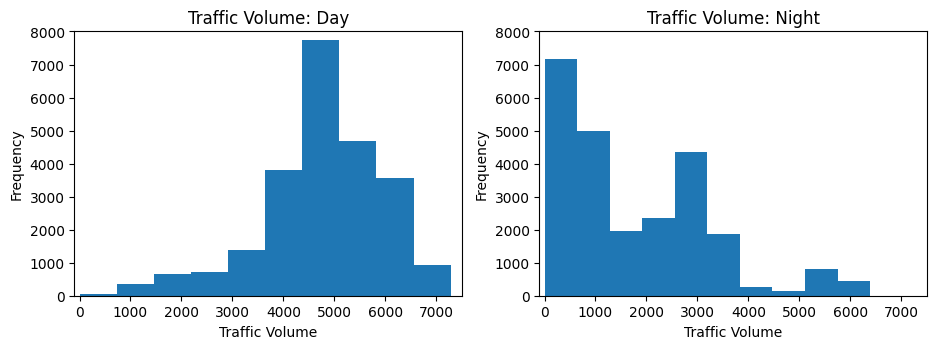

In [72]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)


plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.show()

In [73]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [74]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.


In [75]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

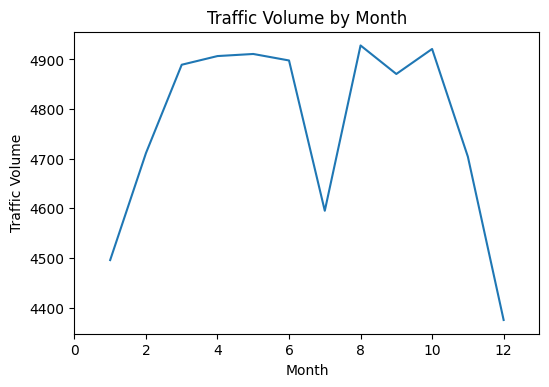

In [76]:
plt.plot(by_month['traffic_volume'])
plt.xlim(0, 13)
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Month')
plt.show()

###### Observations: 
- The traffic volume seems to slow down in the colder months (Nov:Feb), however july is the exception. 

- The traffic volume is highest in the warmer months (Mar:Oct) except july.

In [77]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

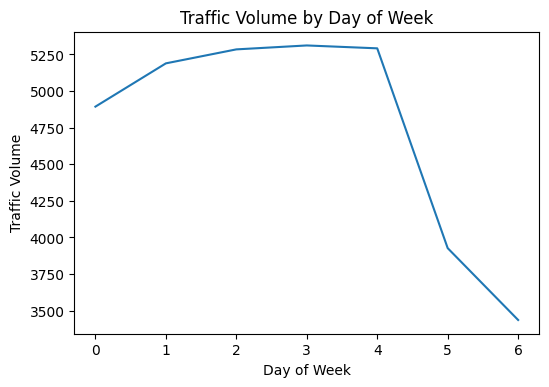

In [78]:
plt.plot(by_dayofweek['traffic_volume'])
plt.title("Traffic Volume by Day of Week")
plt.xlabel('Day of Week')
plt.ylabel('Traffic Volume')
plt.show()

###### Observations:

- The traffic volume is the lowest on saturday & sunday, while it is highest on the weekdays.

In [79]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


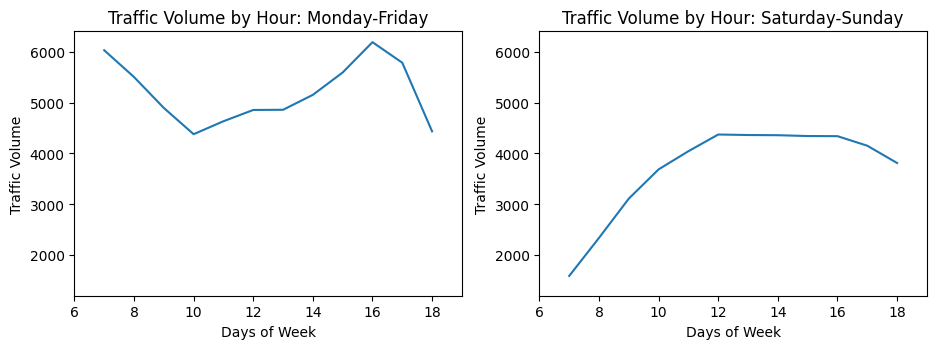

In [80]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title("Traffic Volume by Hour: Monday-Friday")
plt.xlabel('Days of Week')
plt.ylabel('Traffic Volume')
plt.xlim(6,19)
plt.ylim(1200, 6400)

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title("Traffic Volume by Hour: Saturday-Sunday")
plt.xlabel('Days of Week')
plt.ylabel('Traffic Volume')
plt.xlim(6,19)
plt.ylim(1200, 6400)

plt.show()


At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to weekends.
On business days, the rush hours are around 7 and 16.

In [81]:
day.corr()['traffic_volume']

traffic['temp']

0        288.28
1        289.36
2        289.58
3        290.13
4        291.14
          ...  
48199    283.45
48200    282.76
48201    282.73
48202    282.09
48203    282.12
Name: temp, Length: 48204, dtype: float64

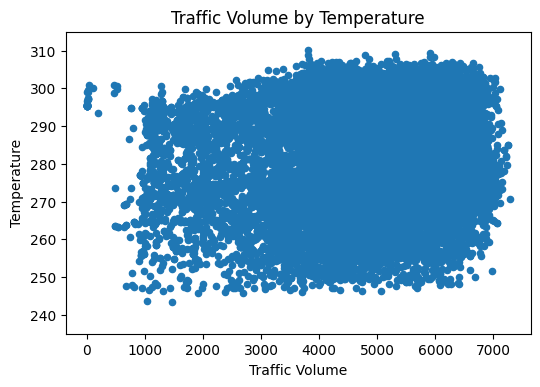

In [82]:
day.plot.scatter('traffic_volume', 'temp')
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.title('Traffic Volume by Temperature')
plt.ylim(235, 315)
plt.show()

Weather Observations: 

- None of the weather columns (temp) are reliable indicators of heavy traffic

In [83]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

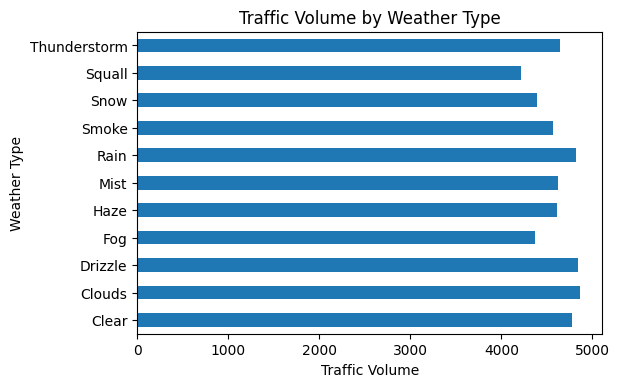

In [92]:

by_weather_main['traffic_volume'].plot.barh()
plt.ylabel('Weather Type')
plt.xlabel('Traffic Volume')
plt.title('Traffic Volume by Weather Type')
plt.show()

Observation:
    - There is no traffic volume exceeding 5,00 cars and there is not a weather type that can be used as a heavy weather indicator

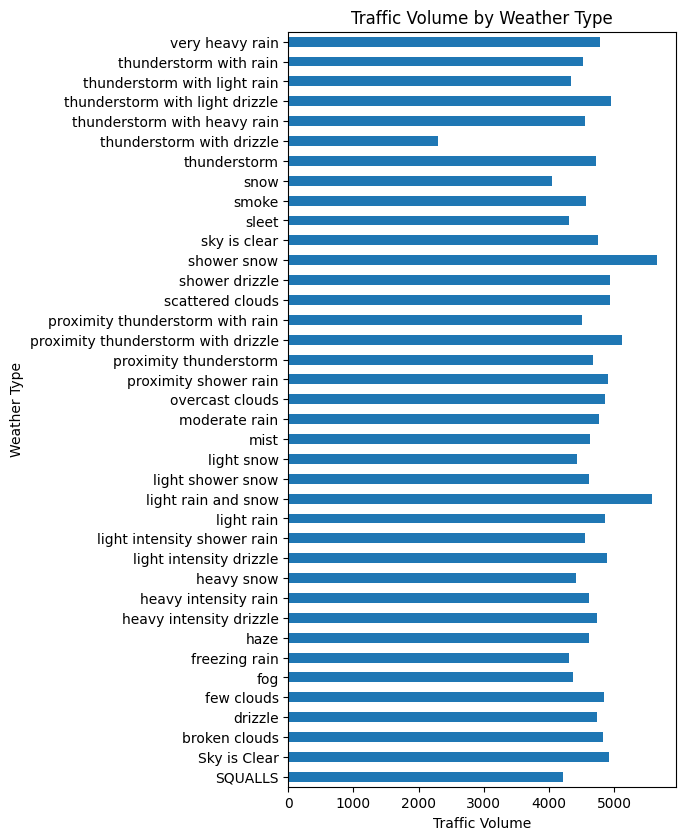

In [91]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.ylabel('Weather Type')
plt.xlabel('Traffic Volume')
plt.title('Traffic Volume by Weather Type')

plt.show()

### Observation: 
- The weather type by description that exceeds 5,000 cars is 'light rain and snow', 'shower snow', 'proximity thunderstorm with drizzle'.
   
   
It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.



# Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

- The traffic is usually heavier on business days compared to the weekends.

- On business days, the rush hours are around 7 and 16.

Weather indicators:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle